<a href="https://colab.research.google.com/github/josepefg/analises-de-dados/blob/master/airbnb/Airbnb_Sydney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.linkedin.com/in/josepegerent"> <img border="0" alt="Linkedin" src="https://img.shields.io/badge/Autor-josepefg-red.svg"> </a>
# **Análise do Airbnb**  
Sydney
Airbnb

# **Obtenção dos dados**  

In [0]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/australia/nsw/sydney/2020-06-11/visualisations/listings.csv")

# **Análise dos dados**

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86917,151.22656,Private room,64,2,196,2020-03-13,1.53,1,364
1,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.86515,151.19190,Private room,14314,2,526,2019-09-22,4.37,2,0
2,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80093,151.26172,Entire home/apt,471,5,2,2019-01-02,0.04,2,173
3,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.87888,151.21439,Entire home/apt,130,3,76,2020-01-03,0.65,1,0
4,58506,"Studio Yindi @ Mosman, Sydney",279955,John,NaN,Mosman,-33.81927,151.23652,Entire home/apt,140,2,280,2020-04-23,2.43,1,267


## Quais as dimensões do dataset?

In [7]:
df.shape

(36901, 16)

## Quais os tipos das colunas?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36901 entries, 0 to 36900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36901 non-null  int64  
 1   name                            36889 non-null  object 
 2   host_id                         36901 non-null  int64  
 3   host_name                       36894 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   36901 non-null  object 
 6   latitude                        36901 non-null  float64
 7   longitude                       36901 non-null  float64
 8   room_type                       36901 non-null  object 
 9   price                           36901 non-null  int64  
 10  minimum_nights                  36901 non-null  int64  
 11  number_of_reviews               36901 non-null  int64  
 12  last_review                     

Aqui já podemos perceber que a coluna neighbourhood_group não tem nenhum valor preenchido, então já é uma candidata a ser excluída.

## Qual a porcentagem de valores ausentes de cada coluna?

In [10]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.278394
last_review                       0.278394
name                              0.000325
host_name                         0.000190
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

## Como estão distribuídas as variáveis?

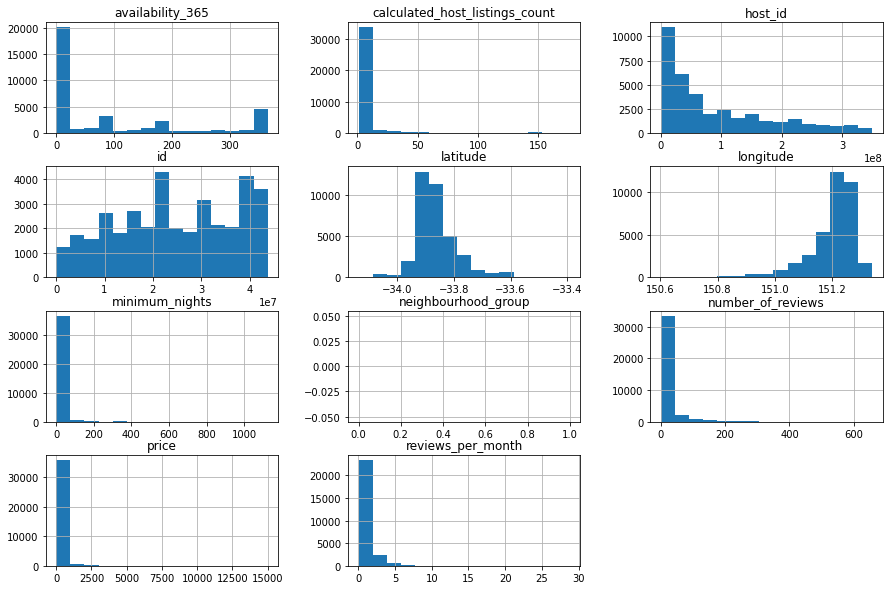

In [12]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

## Há outliers nesse dataset?

### Resumo estatístico.

In [13]:
# resumo estatístico dos dados numéricos
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.690100e+04,3.690100e+04,0.0,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,26628.000000,36901.000000,36901.000000
mean,2.453288e+07,9.131863e+07,NaN,-33.863215,151.198786,227.003333,6.106257,14.866995,0.784623,7.252134,95.462697
std,1.228760e+07,9.191494e+07,NaN,0.072964,0.088700,443.456850,27.658358,36.144464,1.172487,22.746438,129.994717
min,1.115600e+04,1.409300e+04,NaN,-34.135590,150.601470,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.499574e+07,1.828597e+07,NaN,-33.899450,151.175530,79.000000,1.000000,0.000000,0.100000,1.000000,0.000000
50%,2.379250e+07,5.116167e+07,NaN,-33.882000,151.213460,130.000000,2.000000,2.000000,0.300000,1.000000,0.000000
75%,3.577880e+07,1.506891e+08,NaN,-33.829520,151.258910,220.000000,5.000000,11.000000,0.990000,2.000000,178.000000
max,4.373676e+07,3.492491e+08,NaN,-33.390750,151.339870,15000.000000,1125.000000,657.000000,28.820000,176.000000,365.000000


In [16]:
# estatística dos dados categóricos
df.describe(include=['O'])

,name,host_name,neighbourhood,room_type,last_review
count,36889,36894,36901,36901,26628
unique,35976,8205,38,4,1868
top,Home away from home,David,Sydney,Entire home/apt,2020-01-01
freq,22,344,9364,22641,447


### Boxplot das variáveis com outliers.

#### price

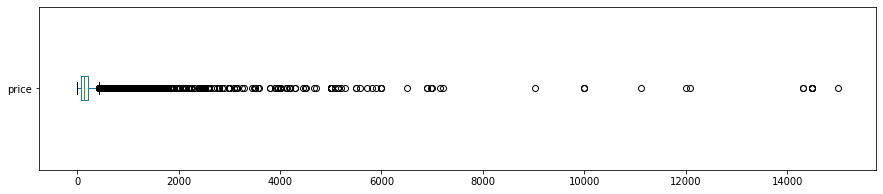


price: valores acima de 670.4601831614208:
1901 entradas
5.1516%


In [30]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

price_1std = df.price.mean()+df.price.std()

# ver quantidade de valores acima de 1 desvio padrão para price
print("\nprice: valores acima de {}:".format(price_1std))
print("{} entradas".format(len(df[df.price > price_1std])))
print("{:.4f}%".format((len(df[df.price > price_1std]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### minimun_nights

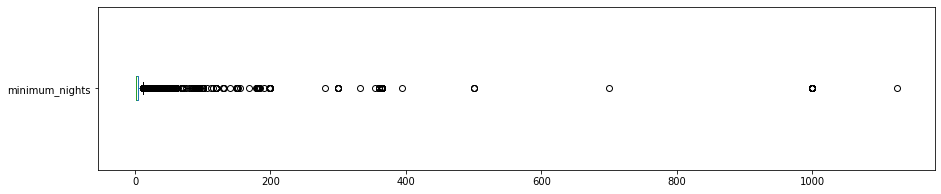

minimum_nights: valores acima de 33.76461550514746:
640 entradas
1.7344%


In [31]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

minimum_nights_1std = df.minimum_nights.mean()+df.minimum_nights.std()


# ver quantidade de valores acima de 1 desvio padrão para minimum_nights
print("minimum_nights: valores acima de {}:".format(minimum_nights_1std))
print("{} entradas".format(len(df[df.minimum_nights > minimum_nights_1std])))
print("{:.4f}%".format((len(df[df.minimum_nights > minimum_nights_1std]) / df.shape[0])*100))

#### number_of_reviews

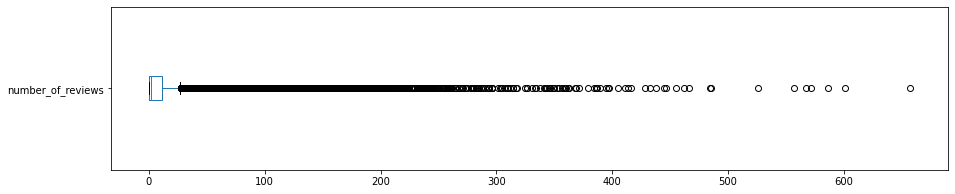

number_of_reviews: valores acima de 51.01145915993561:
3013 entradas
8.1651%


In [32]:
# number_of_reviews
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

number_of_reviews_1std = df.number_of_reviews.mean()+df.number_of_reviews.std()


# ver quantidade de valores acima de 1 desvio padrão para number_of_reviews
print("number_of_reviews: valores acima de {}:".format(number_of_reviews_1std))
print("{} entradas".format(len(df[df.number_of_reviews > number_of_reviews_1std])))
print("{:.4f}%".format((len(df[df.number_of_reviews > number_of_reviews_1std]) / df.shape[0])*100))

#### reviews_per_month

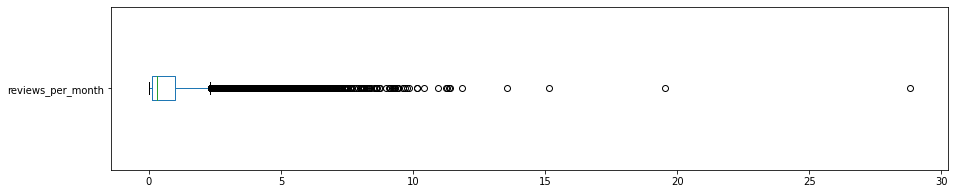

reviews_per_month: valores acima de 1.9571092439392546:
3243 entradas
8.7884%


In [35]:
# reviews_per_month
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

reviews_per_month_1std = df.reviews_per_month.mean()+df.reviews_per_month.std()


# ver quantidade de valores acima de 1 desvio padrão para reviews_per_month
print("reviews_per_month: valores acima de {}:".format(reviews_per_month_1std))
print("{} entradas".format(len(df[df.reviews_per_month > reviews_per_month_1std])))
print("{:.4f}%".format((len(df[df.reviews_per_month > reviews_per_month_1std]) / df.shape[0])*100))

#### calculated_host_listings_count

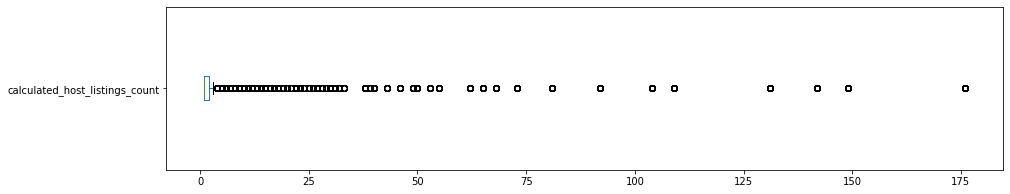

calculated_host_listings_count: valores acima de 29.998571996865515:
2139 entradas
5.7966%


In [36]:
# calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

calculated_host_listings_count_1std = df.calculated_host_listings_count.mean()+df.calculated_host_listings_count.std()


# ver quantidade de valores acima de 1 desvio padrão para calculated_host_listings_count
print("calculated_host_listings_count: valores acima de {}:".format(calculated_host_listings_count_1std))
print("{} entradas".format(len(df[df.calculated_host_listings_count > calculated_host_listings_count_1std])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > calculated_host_listings_count_1std]) / df.shape[0])*100))

#### availability_365

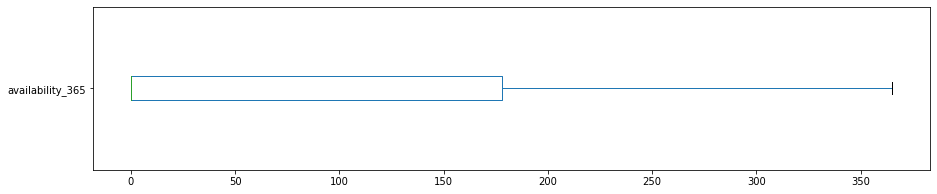

availability_365: valores acima de 225.45741406833608:
6953 entradas
18.8423%


In [42]:
# availability_365
df.availability_365.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

availability_365_1std = df.availability_365.mean()+df.availability_365.std()


# ver quantidade de valores acima de 1 desvio padrão para availability_365
print("availability_365: valores acima de {}:".format(availability_365_1std))
print("{} entradas".format(len(df[df.availability_365 > availability_365_1std])))
print("{:.4f}%".format((len(df[df.availability_365 > availability_365_1std]) / df.shape[0])*100))

### Histogramas sem outliers

In [0]:
# criando uma cópia do dataframe
df_cp = df.copy()

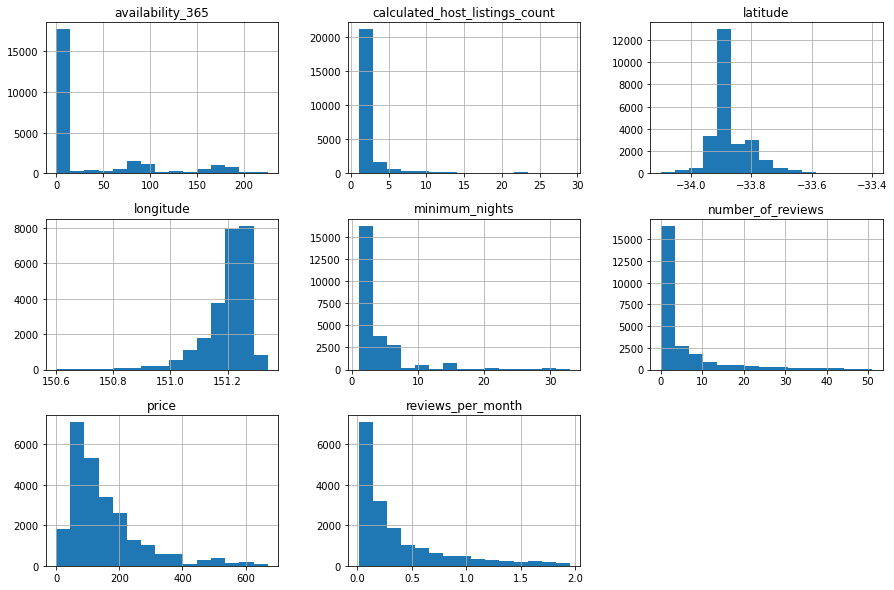

In [47]:
# remover os *outliers* em um novo DataFrame e colunas vazias
df_clean = df_cp.copy()
df_clean.drop(df_clean[df_clean.price > price_1std].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > minimum_nights_1std].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > number_of_reviews_1std].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > reviews_per_month_1std].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > calculated_host_listings_count_1std].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.availability_365 > availability_365_1std].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# remover "host_id" e "id" pois são variáveis sem valor estatístico
df_clean.drop('host_id', axis=1, inplace=True)
df_clean.drop('id', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));